In [3]:
import numpy as np 
import importlib; 
import os
if "add_engmod.py" in os.listdir(): print("Exists!"); import add_engmod
import engmod.structfem as sfem; importlib.reload(sfem)
import matplotlib.pyplot as plt 

Exists!
Added module.


In [7]:
assert sfem.__version__ == "2021-10-18", "Please download the latest version from clickUP."

# Define the material properties

In [9]:
E = 70E9

L_beam = 1

rho = 2700

h = 0.020
b = 0.01

I = 1/12 * b * h**3

A = h * b


NODE_LOCATION [0.5 0. ]


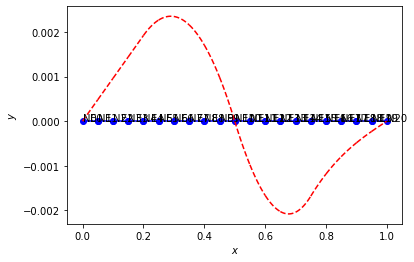

In [17]:

compliance_array = []

natural_frequencies_array = []

displacement = []

node_locations = np.arange(1,20)

node_idx = 9

# for node_idx in range(len(node_locations)):

node_location = node_locations[node_idx]




# In this beam we have three nodes
nodecoor = np.array([
                    [L_beam*0.0,0], 	 # Node 0
                    [L_beam*0.05,0], 	 # Node 1
                    [L_beam*0.1,0], 	 # Node 2
                    [L_beam*0.15,0], 	 # Node 3
                    [L_beam*0.2,0], 	 # Node 4
                    [L_beam*0.25,0], 	 # Node 5
                    [L_beam*0.3,0], 	 # Node 6
                    [L_beam*0.35,0], 	 # Node 7
                    [L_beam*0.4,0], 	 # Node 8
                    [L_beam*0.45,0], 	 # Node 9
                    [L_beam*0.5,0], 	 # Node 10
                    [L_beam*0.55,0], 	 # Node 11
                    [L_beam*0.6,0], 	 # Node 12
                    [L_beam*0.65,0], 	 # Node 13
                    [L_beam*0.7,0], 	 # Node 14
                    [L_beam*0.75,0], 	 # Node 15
                    [L_beam*0.8,0], 	 # Node 16
                    [L_beam*0.85,0], 	 # Node 17
                    [L_beam*0.9,0], 	 # Node 18
                    [L_beam*0.95,0], 	 # Node 19
                    [L_beam*1.0,0], 	 # Node 20
                    ])

print("NODE_LOCATION",nodecoor[node_location,:])

elemconn = np.array([
                        [0,1], # Node 0 is connected to Node 1 to form Element 0
                        [1,2], # Node 1 is connected to Node 2 to form Element 1
                        [2,3], # Node 2 is connected to Node 3 to form Element 2
                        [3,4], # Node 3 is connected to Node 4 to form Element 3
                        [4,5], # Node 4 is connected to Node 5 to form Element 4
                        [5,6], # Node 5 is connected to Node 6 to form Element 5
                        [6,7], # Node 6 is connected to Node 7 to form Element 6
                        [7,8], # Node 7 is connected to Node 8 to form Element 7
                        [8,9], # Node 8 is connected to Node 9 to form Element 8
                        [9,10], # Node 9 is connected to Node 10 to form Element 9
                        [10,11], # Node 10 is connected to Node 11 to form Element 10
                        [11,12], # Node 11 is connected to Node 12 to form Element 11
                        [12,13], # Node 12 is connected to Node 13 to form Element 12
                        [13,14], # Node 13 is connected to Node 14 to form Element 13
                        [14,15], # Node 14 is connected to Node 15 to form Element 14
                        [15,16], # Node 15 is connected to Node 16 to form Element 15
                        [16,17], # Node 16 is connected to Node 17 to form Element 16
                        [17,18], # Node 17 is connected to Node 18 to form Element 17
                        [18,19], # Node 18 is connected to Node 19 to form Element 18
                        [19,20], # Node 19 is connected to Node 20 to form Element 19
                     ])

# Initialise the prescribed displacement as an empty list:
prescribed_displacement = []
# Prescribed displacement applied to Node 0, in the 0 direction (x-direcion) with a displacement of 0
prescribed_displacement.append(np.array([0,0,0]))
# Prescribed displacement applied to Node 0, in the 1 direction (y-direcion) with a displacement of 0
prescribed_displacement.append(np.array([0,1,0]))
# Prescribed displacement applied to Node 2, in the 1 direction (x-direcion) with a displacement of 0
prescribed_displacement.append(np.array([20,1,0]))
# Prescribed displacement applied to Node 3, in the 1 direction (x-direcion) with a displacement of 0
prescribed_displacement.append(np.array([node_location,1,0]))
# Convert the prescribed displacement list to an array:
prescribed_displacement = np.array(prescribed_displacement)

# Initialise the prescribed force as an empty list:
prescribed_forces = []
# Prescribed force applied to Node 1, in the 1 direction (y-direcion) with a magnitude of F.
prescribed_forces.append(np.array([4,2,50]))
prescribed_forces.append(np.array([10,2,-100]))
prescribed_forces.append(np.array([15,2,100]))
# Convert the prescribed force list to an array:
prescribed_forces = np.array(prescribed_forces)

# Element properties
elemprop = {}
# Young's modulus [Pa]
elemprop["E"] = np.ones(elemconn.shape[0]) * E
# Area moment of inertia [m^4]
elemprop["I"] = np.ones(elemconn.shape[0]) * I
# Cross-sectional area [m^2]
elemprop["A"] = np.ones(elemconn.shape[0]) * A
# Density [kg/m^3]
elemprop["density"] = np.ones(elemconn.shape[0]) * rho

fmn = sfem.FEM_Beam_2D(nodecoor,                # Nodal coordinates
                       elemconn,                # Element connectivity
                       prescribed_displacement, # Prescribed displacements
                       prescribed_forces,       # Prescribed forces
                       elemprop)                # Element properties

fmn.solve()

u = fmn.solution_dict["displacements"]

K = fmn.stiffness_global()

fmn.plot_system(show_displacement=True)

# displacement.append(abs_u)

# compliance_array.append(compliance)

# natural_frequencies_array.append(natfreq)


ValueError: x and y must have same first dimension, but have shapes (19,) and (0,)

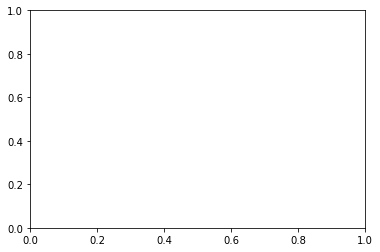

In [18]:

plt.figure(0)
plt.plot(node_locations,compliance_array)

plt.figure(1)
plt.plot(node_locations,displacement)

plt.figure(2)
plt.plot(node_locations,natural_frequencies_array[:,0])

plt.figure(3)
plt.plot(node_locations,natural_frequencies_array[:,1])

plt.figure(4)
plt.plot(node_locations,natural_frequencies_array[:,2])
